In [43]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Cargar los datos
file_path = "Respuestas.xlsx"  # Ruta del archivo
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")



### **Explicación**
1. **Importación de librerías:**  
   - `pandas`: Para manipular y analizar datos tabulares.  
   - `numpy`: Para cálculos matemáticos y estadísticos avanzados.  
   - `matplotlib` y `seaborn`: Para la creación y personalización de gráficos.  

2. **Estilo de gráficos:**  
   Configuramos los gráficos con un diseño limpio y una paleta de colores agradable para facilitar la interpretación visual de los resultados.

3. **Carga de datos:**  
   Se utiliza la función `pd.read_excel` para leer el archivo **`Respuestas.xlsx`**, seleccionando la hoja específica `Respuestas de formulario 1`.  

4. **Verificación:**  
   Visualizamos las primeras filas del DataFrame con `df.head()` para asegurarnos de que los datos se cargaron correctamente.


In [44]:
# Filtrar datos necesarios
actualizados_bastante = df[df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '] == 'Bastante']
gestion_software = df[df['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']

# Calcular P(A): Proporción de estudiantes en "Desarrollo y Gestión de Software"
p_a = len(gestion_software) / len(df)

# Calcular P(B): Proporción de estudiantes bastante actualizados
p_b = len(actualizados_bastante) / len(df)

# Calcular P(B|A): Proporción de estudiantes bastante actualizados en "Desarrollo y Gestión de Software"
p_b_given_a = len(actualizados_bastante[actualizados_bastante['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']) / len(gestion_software)

# Aplicar Teorema de Bayes
p_a_given_b = (p_b_given_a * p_a) / p_b

# Mostrar resultado
print(f"La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: {p_a_given_b:.2%}")


La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: 25.00%


## **Problema 1: Cálculo de la Media de las Edades**

### Descripción:
Calculamos la media de las edades de los participantes en la encuesta. La media es una medida de tendencia central que representa el promedio de los datos.

In [45]:
# Cálculo de la media
media_edad = df['Edad'].mean()

# Mostrar resultado
print(f"La media de las edades es: {media_edad:.2f}")

La media de las edades es: 24.37


### **Explicación de la Respuesta:**
La media calculada nos indica que, en promedio, los participantes de la encuesta tienen una edad de **`24.37 años`**. Este valor resume los datos y es útil para entender la tendencia central.

---

## **Problema 2: Construcción de una Tabla de Frecuencia**

### Descripción:
Creamos una tabla de frecuencia agrupada para las edades, que incluye:
- Intervalos de clase
- Frecuencia absoluta (\(f\))
- Frecuencia relativa (\(fr\))
- Frecuencia acumulada (\(F\))

---


In [46]:
# Crear intervalos para las edades
bin_edges = [20, 25, 30, 35, 40, 45]  
bins = pd.cut(df['Edad'], bins=bin_edges)

# Crear la tabla de frecuencia
tabla_frecuencia = df['Edad'].groupby(bins, observed=False).agg([
    ('f', 'count'),  # Frecuencia absoluta
])
tabla_frecuencia['fr'] = tabla_frecuencia['f'] / len(df)  # Frecuencia relativa
tabla_frecuencia['F'] = tabla_frecuencia['f'].cumsum()  # Frecuencia acumulada

# Mostrar la tabla
tabla_frecuencia


,f,fr,F
Edad,,,
"(20, 25]",7,0.233333,7
"(25, 30]",6,0.200000,13
"(30, 35]",4,0.133333,17
"(35, 40]",0,0.000000,17
"(40, 45]",1,0.033333,18


### **Explicación de la Respuesta:**
La tabla de frecuencia nos permite visualizar la distribución de edades en intervalos definidos. Esto es útil para identificar dónde se concentran los datos y analizar patrones en los rangos de edad.

---

## **Problema 3: Cálculo de la Desviación Estándar de las Edades**

### Descripción:
La desviación estándar mide la dispersión de los datos respecto a la media. Una desviación estándar alta indica que los datos están más dispersos, mientras que una baja sugiere que están concentrados cerca de la media.

---


In [47]:
# Cálculo de la desviación estándar
desviacion_estandar = df['Edad'].std()

# Mostrar resultado
print(f"La desviación estándar de las edades es: {desviacion_estandar:.2f}")


La desviación estándar de las edades es: 5.72


### **Explicación de la Respuesta:**
La desviación estándar obtenida es de **`5.72 años`**, lo que indica cuánto se desvían las edades de los encuestados respecto a la media. Una baja desviación sugeriría que las edades son homogéneas, mientras que una alta sugiere mayor variabilidad.

---

## **Problema 4: Histograma de la Distribución de Edades**

### Descripción:
Construimos un histograma para visualizar la distribución de edades. Este gráfico muestra cómo se distribuyen los datos en diferentes intervalos.

---


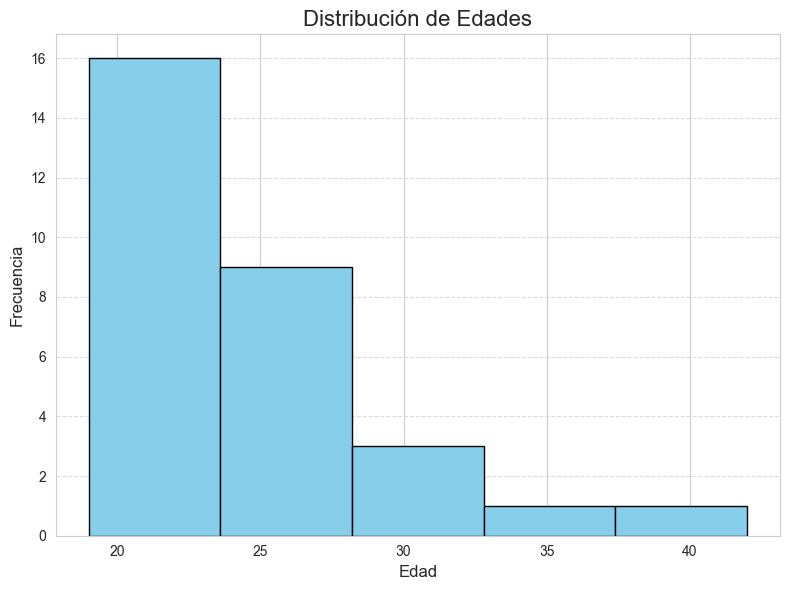

In [48]:


# Crear histograma
plt.figure(figsize=(8, 6))
plt.hist(df['Edad'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribución de Edades", fontsize=16)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Explicación de la Respuesta:**
El histograma muestra la distribución de las edades en la muestra. Podemos observar si las edades están concentradas en un rango específico o si están dispersas en todo el espectro analizado.

---

## **Problema 5: Análisis de Varianza (Varianza y Desviación Estándar)**

### Descripción:
En este problema, calculamos las medidas de dispersión de las edades de los encuestados, incluyendo:
- **Varianza:** Mide la variabilidad de los datos respecto a la media.
- **Desviación estándar:** Es la raíz cuadrada de la varianza y se interpreta en las mismas unidades que los datos originales.

Estas medidas son útiles para entender qué tan dispersas están las edades de los participantes.

---


In [49]:
# Cálculo de la varianza y desviación estándar
varianza_poblacional = df['Edad'].var(ddof=0)  # Varianza poblacional
varianza_muestral = df['Edad'].var(ddof=1)  # Varianza muestral
desviacion_estandar = df['Edad'].std()  # Desviación estándar

# Mostrar los resultados
print(f"Varianza Poblacional: {varianza_poblacional:.2f}")
print(f"Varianza Muestral: {varianza_muestral:.2f}")
print(f"Desviación Estándar: {desviacion_estandar:.2f}")


Varianza Poblacional: 31.63
Varianza Muestral: 32.72
Desviación Estándar: 5.72


### **Explicación de la Respuesta:**
1. **Varianza Poblacional:**  
   Calculada con \( ddof=0 \), considera todos los datos como una población. Representa la media de los cuadrados de las desviaciones respecto a la media.

2. **Varianza Muestral:**  
   Calculada con \( ddof=1 \), se utiliza para estimar la varianza de una población a partir de una muestra.

3. **Desviación Estándar:**  
   Es la raíz cuadrada de la varianza. En este caso, se interpreta en las mismas unidades que las edades (años), lo que facilita su comprensión.


---
## **Problema 6: Tablas de Frecuencia y Representación Gráfica**

### Descripción:
En este problema, generamos una tabla de frecuencia agrupada para la variable **Edad**. La tabla incluirá:
- **Intervalos de clase:** Rango de valores agrupados.
- **Frecuencia absoluta (\(f\)):** Número de participantes en cada intervalo.
- **Frecuencia relativa (\(fr\)):** Porcentaje de participantes en cada intervalo.
- **Frecuencia acumulada (\(F\)):** Suma acumulativa de las frecuencias absolutas.

Finalmente, representamos estos datos mediante un histograma para visualizar la distribución.

---



In [50]:
# Crear intervalos de clase para la edad
bins = [20, 25, 30, 35, 40, 45]  # Ajustar límites según los datos
labels = ["20-25", "25-30", "30-35", "35-40", "40-45"]  # Etiquetas de los intervalos
df['Intervalos_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, include_lowest=True)

# Generar la tabla de frecuencia
tabla_frecuencia = df['Intervalos_Edad'].value_counts(sort=False).to_frame(name='f')  # Frecuencia absoluta
tabla_frecuencia['fr'] = tabla_frecuencia['f'] / len(df)  # Frecuencia relativa
tabla_frecuencia['F'] = tabla_frecuencia['f'].cumsum()  # Frecuencia acumulada

# Mostrar la tabla de frecuencia
tabla_frecuencia.reset_index(inplace=True)
tabla_frecuencia.rename(columns={'index': 'Intervalo'}, inplace=True)
tabla_frecuencia


,Intervalos_Edad,f,fr,F
0,20-25,14,0.466667,14
1,25-30,6,0.200000,20
2,30-35,4,0.133333,24
3,35-40,0,0.000000,24
4,40-45,1,0.033333,25


### **Explicación de la Tabla de Frecuencia**
1. **Frecuencia Absoluta (\(f\)):**  
   Indica cuántos participantes caen dentro de cada intervalo de edad.

2. **Frecuencia Relativa (\(fr\)):**  
   Proporciona el porcentaje del total de participantes que pertenecen a cada intervalo.

3. **Frecuencia Acumulada (\(F\)):**  
   Suma las frecuencias absolutas de los intervalos hasta un punto dado, permitiendo analizar la acumulación de datos.

La tabla ayuda a resumir la información y facilita su interpretación.

### Descripción:
Calculamos las medidas de **asimetría** y **curtosis** para analizar la distribución de edades:
- **Asimetría:** Indica si los datos están simétricamente distribuidos o sesgados hacia un lado.
- **Curtosis:** Evalúa si los datos tienen colas más largas o más cortas que una distribución normal.

---




In [51]:
# Calcular medidas de forma
asimetria = df['Edad'].skew()  # Asimetría
curtosis = df['Edad'].kurt()  # Curtosis

# Mostrar resultados
print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")


Asimetría: 1.31
Curtosis: 1.65


### **Explicación de la Respuesta:**
1. **Asimetría:**  
   - Un valor cercano a 0 indica que los datos son simétricos.
   - Un valor positivo sugiere sesgo hacia la derecha, mientras que un valor negativo indica sesgo hacia la izquierda.

2. **Curtosis:**  
   - Una curtosis cercana a 3 indica una distribución normal.
   - Un valor mayor indica colas largas (leptocúrtica) y uno menor colas cortas (platicúrtica).

**Conclusión:** Estas medidas ayudan a interpretar la forma de la distribución de los datos y su desviación respecto a la normalidad.

---

## **Problema 8: Rango y Coeficiente de Variación**

### Descripción:
Calculamos el rango y el coeficiente de variación de las edades:
- **Rango:** Diferencia entre el valor máximo y mínimo.
- **Coeficiente de Variación (CV):** Mide la dispersión relativa respecto a la media.

---


In [52]:
# Calcular rango y coeficiente de variación
rango = df['Edad'].max() - df['Edad'].min()
cv = df['Edad'].std() / df['Edad'].mean()

# Mostrar resultados
print(f"Rango: {rango:.2f}")
print(f"Coeficiente de Variación (CV): {cv:.2%}")


Rango: 23.00
Coeficiente de Variación (CV): 23.48%


### **Explicación de la Respuesta:**
1. **Rango:**  
   Representa la amplitud de los datos, es decir, la diferencia entre el valor más alto y el más bajo.

2. **Coeficiente de Variación (CV):**  
   Es una medida de dispersión relativa (porcentaje). Un CV bajo indica que los datos están muy concentrados respecto a la media, mientras que un CV alto sugiere mayor dispersión.

**Conclusión:** Estas medidas proporcionan información adicional sobre la variabilidad y amplitud de los datos.

---

## **Problema 9: Representación Gráfica de Datos**

### Descripción:
Creamos gráficos complementarios para visualizar los datos:
1. **Diagrama de Caja y Bigotes (Boxplot):** Muestra los percentiles, valores extremos y posibles outliers.
2. **Gráfico de Barras:** Compara las frecuencias absolutas de los intervalos de edad.

---


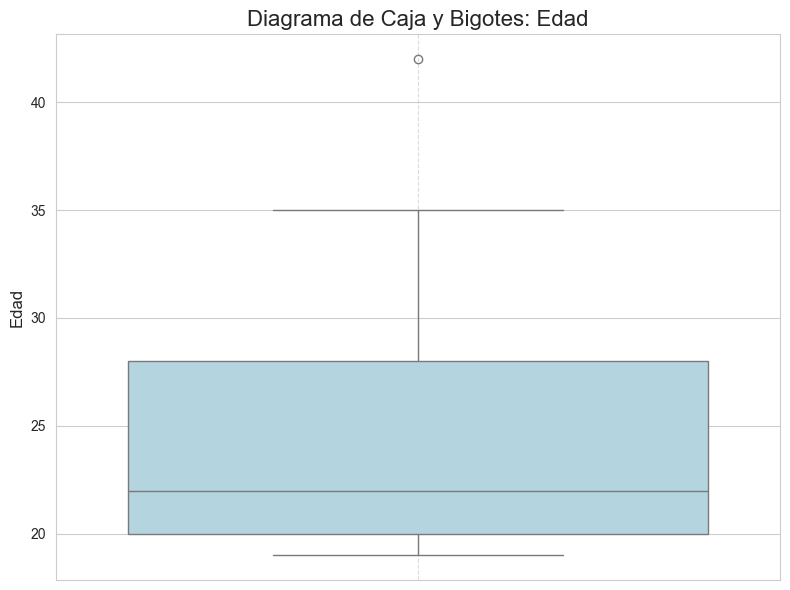

In [53]:
# Crear diagrama de caja y bigotes
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Edad'], color='lightblue')
plt.title("Diagrama de Caja y Bigotes: Edad", fontsize=16)
plt.ylabel("Edad", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### **Explicación del Diagrama de Caja y Bigotes (Boxplot)**

El **diagrama de caja y bigotes** representa la distribución de la variable **Edad** de los encuestados:

1. **Caja central:**
   - La parte central (rectángulo) muestra el rango intercuartil (IQR), que es la diferencia entre el tercer cuartil (Q3, límite superior de la caja) y el primer cuartil (Q1, límite inferior de la caja).
   - La línea dentro de la caja representa la **mediana**.

2. **Bigotes (líneas superiores e inferiores):**
   - Los extremos de los bigotes indican los valores mínimo y máximo dentro de 1.5 veces el rango intercuartil desde Q1 y Q3.

3. **Outlier (círculo fuera del rango):**
   - El punto fuera del rango de los bigotes es un valor atípico, que está significativamente más alejado del resto de los datos.

**Conclusión:**
El boxplot muestra que la mayoría de los datos están concentrados entre 20 y 35 años. Sin embargo, existe al menos un valor extremo, representado por el punto superior (edad superior a 40 años).




